## 1.このテキストについて

### テキストの目的
- 数式演算ライブラリのNumPyに慣れる
- 勾配降下法の仕組みを知る

どのように学ぶか
***

勾配降下法を下山のたとえた問題を解くプログラムを作成することで、機械学習の基礎的な要素を学びます。



## 2.富士下山問題

勾配降下法は山や谷を下ることに例えられます。
富士山の標高データを 最小化したい目的関数 に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

## 3.富士山から下る

標高データの取得

標高データはcsvファイルを配布します。以下のコードで読み込むことができます。

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[:3])

[[  0.        35.134141 139.132082   0.         0.      ]
 [  1.        35.135826 139.129202   0.       322.      ]
 [  2.        35.13751  139.126322   0.       644.      ]]


左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。



### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

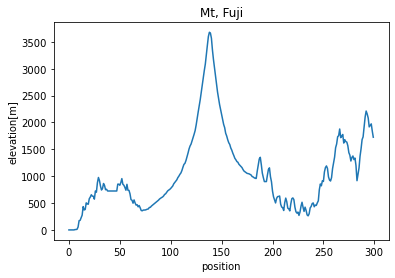

In [3]:
import matplotlib.pyplot as plt

plt.title('Mt, Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。



### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

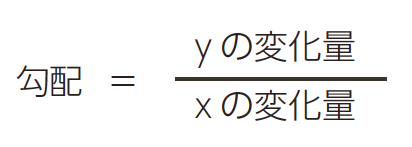


今いる地点を入力してください:136


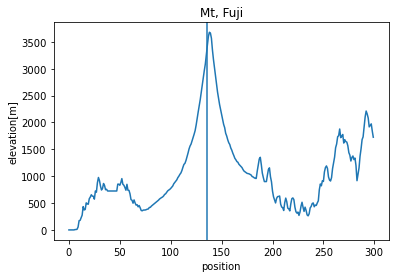

In [4]:
def gradient(x):
    now_gradient = (fuji[x, 3] - fuji[x-1, 3]) / (fuji[x, 0]-fuji[x-1,0]) #今いる地点しか分からないから
    return now_gradient
    
x = int(input('今いる地点を入力してください:'))
gradient(x)

plt.title('Mt, Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.axvline(x=x, ymin=0, ymax=1)
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと
#### 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 
となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。
 
 《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。



今いる地点を入力してください:136


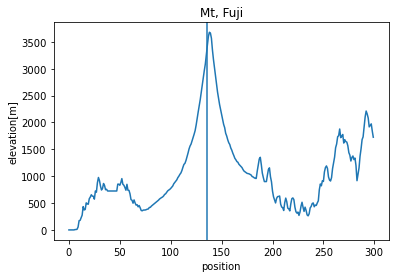

In [5]:
def destination_point(x, α= 0.2): #今いる地点が仮引数で、αもすでに指定されているので、ここに入れておく
    now_gradient = (fuji[x, 3] - fuji[x-1, 3]) #問題2でやった、現在の勾配の式
    next_point = fuji[x, 0] - α * now_gradient #上記の移動先の地点を出す公式の当てはめただけ
    if next_point < 0 or next_point >= 300: #ここで移動先の地点の条件設定をしておく - の場合と、300以上の場合は存在しないはず
        print('移動先の地点が存在しません。今いる地点を入力し直してください')
    else:
        return int(next_point) #上記の移動先の地点意外になったら、四捨五入して、返す

x = int(input('今いる地点を入力してください:'))
destination_point(x)

plt.title('Mt, Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.axvline(x=x, ymin=0, ymax=1)
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

### 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。



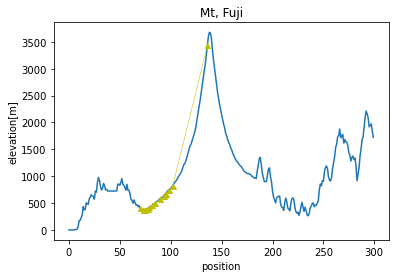

In [20]:
def dcending(x, α= 0.2):
    point_list = [x]
    
    while True:
        next_point = point_list[-1] - α * gradient(point_list[-1])
        if  0 <= next_point < 300 and int(round(next_point)) != point_list[-1] :
            point_list.append(int(round(next_point)))
            if point_list[-1] == point_list[-2]:
                break
        else:
            break
        
            
    return point_list

dcending(136)

plt.title('Mt, Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[dcending(136), 0], fuji[dcending(136), 3], marker = '^', color = 'y', ms = 5, lw = 0.5 ) 
plt.show()

### 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》


断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする


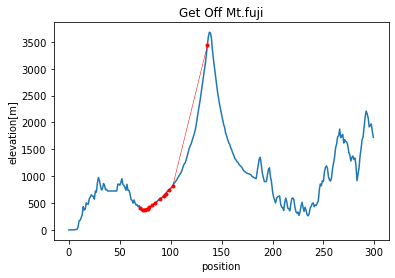

In [21]:
start_point = 136
plt.title('Get Off Mt.fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[dcending(start_point), 0], fuji[dcending(start_point), 3], marker = 'o', color = 'r', ms = 3, lw = 0.5 ) #地点と標高のグラフ 
plt.show()

### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。


《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [23]:
def dcending(start, α= 0.003):
    point_list = [start]
    while True:
        next_point = point_list[-1] - α * gradient(point_list[-1])
        if  0 <= next_point < 300 and int(next_point) != point_list[-1] :
            point_list.append(int(next_point))
            if point_list[-1] == point_list[-2]:
                break
        else:
            break

    return point_list

each_list = []
for start in range(len(fuji)):
    print('{}回目'.format(int(start)+1))
    each_list.append(dcending(start)) #格納している
    print(each_list[-1])

1回目
[0]
2回目
[1]
3回目
[2]
4回目
[3]
5回目
[4]
6回目
[5]
7回目
[6, 5]
8回目
[7, 6, 5]
9回目
[8, 7, 6, 5]
10回目
[9, 8, 7, 6, 5]
11回目
[10, 9, 8, 7, 6, 5]
12回目
[11, 10, 9, 8, 7, 6, 5]
13回目
[12, 11, 10, 9, 8, 7, 6, 5]
14回目
[13, 12, 11, 10, 9, 8, 7, 6, 5]
15回目
[14, 13, 12, 11, 10, 9, 8, 7, 6, 5]
16回目
[15]
17回目
[16, 15]
18回目
[17, 16, 15]
19回目
[18]
20回目
[19]
21回目
[20, 19]
22回目
[21, 20, 19]
23回目
[22, 21, 20, 19]
24回目
[23]
25回目
[24]
26回目
[25]
27回目
[26, 25]
28回目
[27]
29回目
[28, 27]
30回目
[29, 28, 27]
31回目
[30]
32回目
[31]
33回目
[32]
34回目
[33, 32]
35回目
[34, 33, 32]
36回目
[35]
37回目
[36]
38回目
[37, 36]
39回目
[38]
40回目
[39]
41回目
[40]
42回目
[41]
43回目
[42]
44回目
[43]
45回目
[44]
46回目
[45]
47回目
[46]
48回目
[47]
49回目
[48, 47]
50回目
[49]
51回目
[50]
52回目
[51, 50]
53回目
[52, 51, 50]
54回目
[53]
55回目
[54]
56回目
[55]
57回目
[56]
58回目
[57, 56]
59回目
[58]
60回目
[59]
61回目
[60]
62回目
[61]
63回目
[62]
64回目
[63]
65回目
[64, 63]
66回目
[65]
67回目
[66]
68回目
[67, 66]
69回目
[68]
70回目
[69, 68]
71回目
[70]
72回目
[71]
73回目
[72]
74回目
[73, 72]
75回目
[74, 73, 72]
76回目
[75, 74

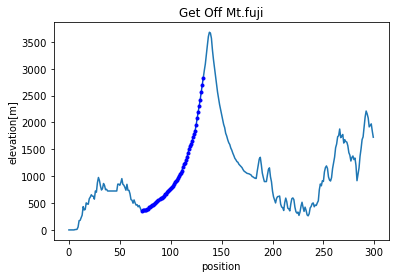

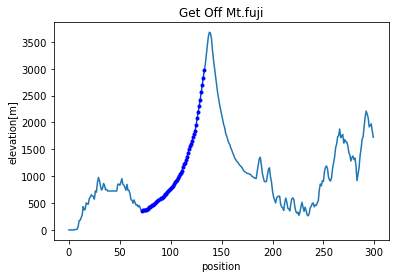

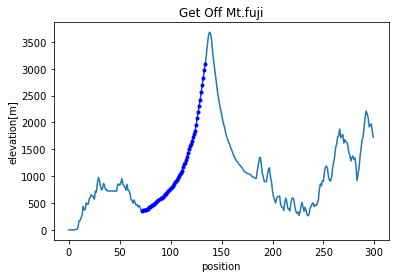

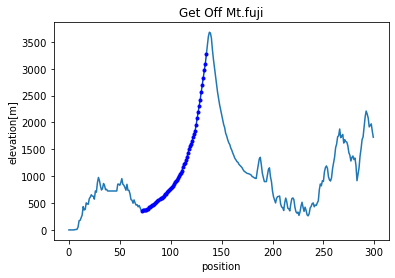

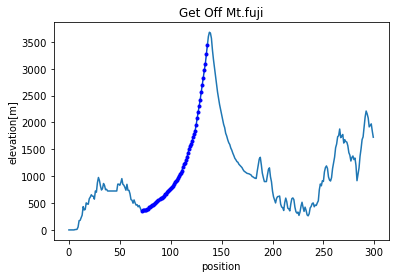

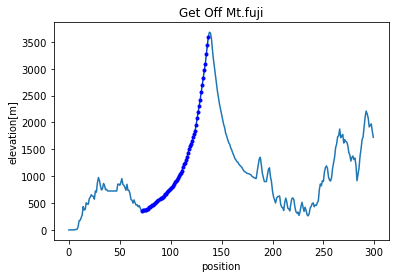

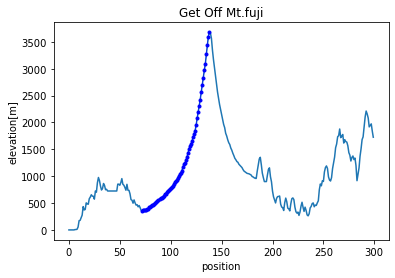

In [25]:
for start in range(132,139):
    plt.title('Get Off Mt.fuji')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.plot(fuji[:, 0], fuji[:, 3])
    plt.plot(each_list[start], fuji[each_list[start], 3], marker = 'o', color = 'b', ms = 3, lw = 0.5 ) #地点と標高のグラフ 
    plt.show()

### 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

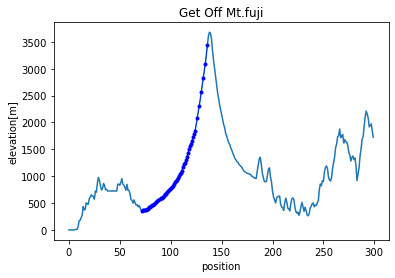

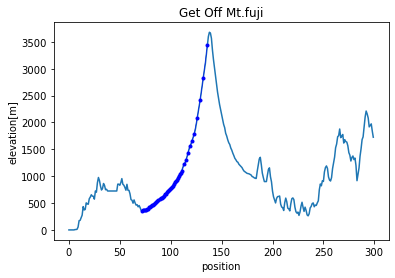

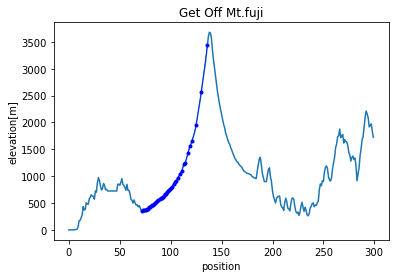

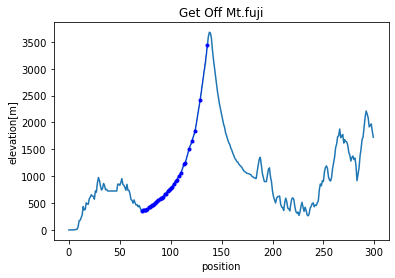

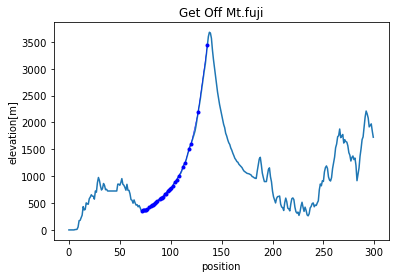

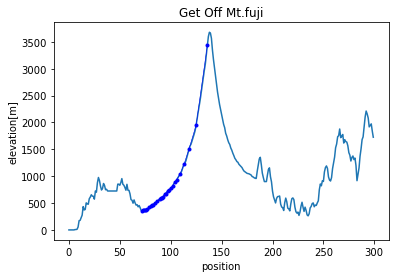

In [15]:
def dcending(start, α):
    point_list = [start]
    while True:
        next_point = point_list[-1] - α * gradient(point_list[-1])
        if  0 <= next_point < 300 and int(next_point) != point_list[-1] :
            point_list.append(int(next_point))
            if point_list[-1] == point_list[-2]:
                break
        else:
            break

    return point_list

start = 136
for α in np.arange(0.01, 0.07, 0.01):
    plt.title('Get Off Mt.fuji')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.plot(fuji[:, 0], fuji[:, 3])
    plt.plot(fuji[dcending(start, α), 0], fuji[dcending(start, α), 3],  marker = 'o', color = 'b', ms = 3, lw = 0.5 ) #地点と標高のグラフ 
    plt.show()

### 質問
1、ハイパーパラメーターを小さくしないと問題6のリスト作成が終わらないのを解決する手はあるのでしょうか。
収束させるために小さくするしかなかったです。

2、同じく問題6のグラフ化でグラフが一点のみになってしまいます。何かヒントをいただけるとありがたいです。
